In [15]:
from torch import nn
import numpy as np
import torch
from torch.distributions.normal import Normal
import torch.optim as optim
import torch.utils.data

import math


zeros = torch.zeros(1, 60, 210)
# zeros = zeros.unsqueeze(0)
print(zeros.size())
conv = nn.Conv2d(1, 64, 4, stride=2, padding=1)

x = conv(zeros)
print(x.size())

conv2 = nn.Conv2d(64, 5, 3)

x = conv2(x)
print(x.size())

flatten = nn.Flatten()
x = flatten(x)

print(x.size())

dense = nn.Linear(13312, 64)
x = dense(x)

print(x.size())

# dilconv = nn.Conv2d(64, 64, (3, 3), padding=(2,1), dilation=(16,1), stride=(1,2))
# x = dilconv(x)
# print(x.size())

# conv2 = nn.Conv2d(64, 64, 3, padding='same')
# x = dilconv(x)
# print(x.size())

torch.Size([1, 60, 210])
torch.Size([64, 30, 105])
torch.Size([5, 28, 103])
torch.Size([5, 2884])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (5x2884 and 13312x64)

In [ ]:
from AutoEncoderDenoiser import SPDenoiser
import torch

zeros = torch.zeros(1, 60, 212)
zeros = zeros.unsqueeze(0)
print(zeros.size())
filters = (32, 64, 64, 64)
kernels = (3, 3, 3, 3)
strides = (1, 2, 2, 1)
latent_space_dim = 2

model = SPDenoiser(60, 210, filters, kernels, strides, latent_space_dim, device = 'cpu')

x = model(zeros)
# print(model)
print(x.size())

c:\Users\woute\.conda\envs\Diffwave\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([1, 1, 60, 212])
torch.Size([1, 1, 60, 212])
torch.Size([1, 32, 60, 212])
torch.Size([1, 64, 30, 106])
torch.Size([1, 64, 15, 53])
torch.Size([1, 64, 15, 53])
torch.Size([1, 50880])
torch.Size([1, 2])
torch.Size([1, 50880])
torch.Size([1, 64, 15, 53])
(1, 1)
torch.Size([1, 64, 15, 53])
(1, 1)
torch.Size([1, 64, 30, 106])
(1, 1)
torch.Size([1, 64, 60, 212])
torch.Size([1, 1, 60, 212])
torch.Size([1, 1, 60, 212])


In [ ]:
%load_ext autoreload

%autoreload 2

## Preprocessing Data

### Show a file

Samplerate:  32000  | OGSamplerate:  32000
Samplerate:  32000  | OGSamplerate:  44100
resampling
Clean audio: 


Noisy audio: 


Recreated clean audio: 
Samplerate:  32000


Recreated decoded clean audio: 
Samplerate:  32000


Recreated clean audio with wav2world: 
Samplerate:  32000


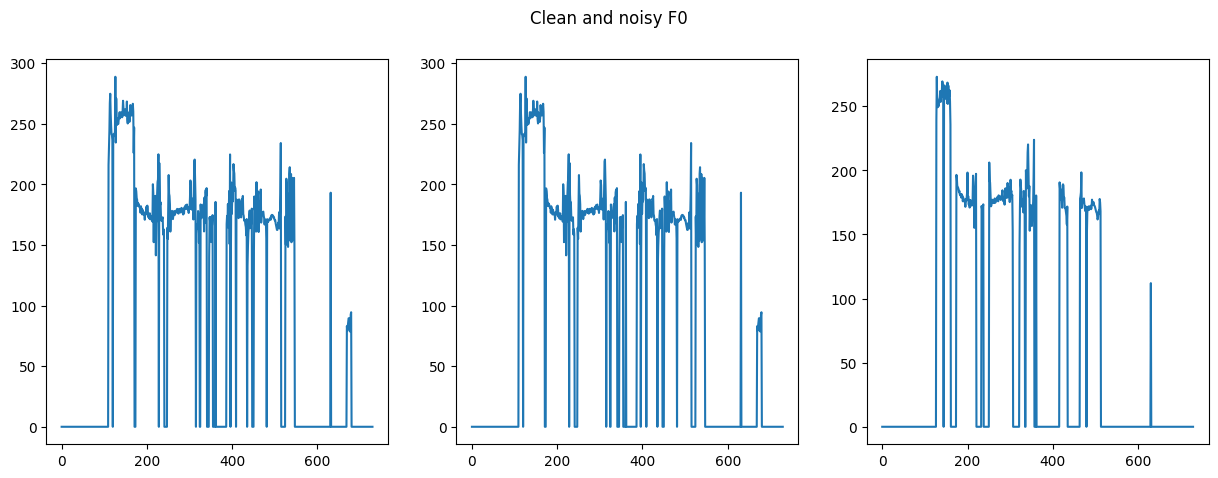

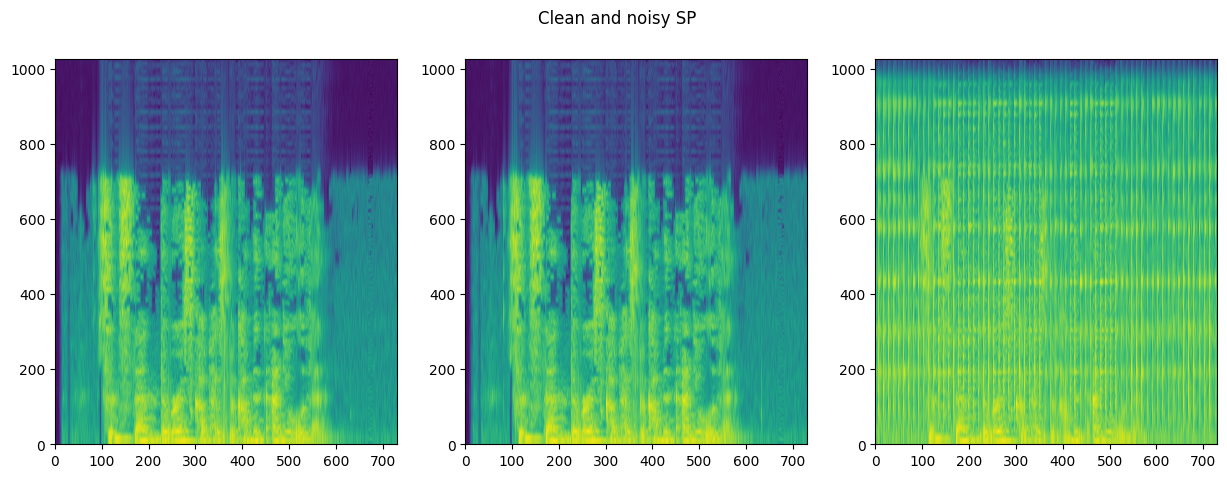

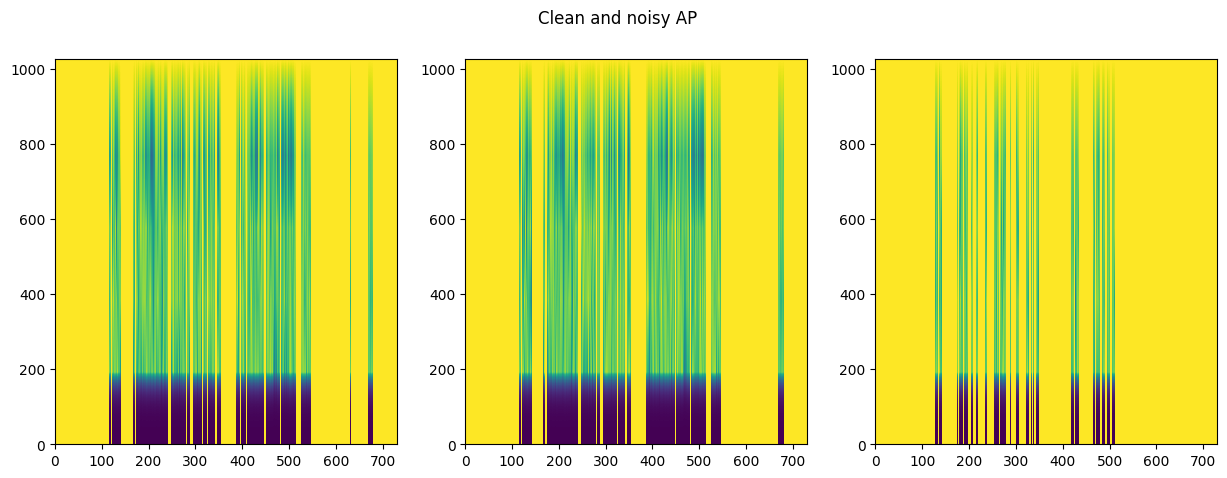

In [ ]:
from preprocess import process_wav, decode_harmonic
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import IPython
import numpy as np
import pyworld as pw
import soundfile as sf

cleanvoice = "G:/Projects/2022-2023/ConvDenoiser/dataset/voice/common_voice_en_34919893.mp3"
ambience = "G:/Projects/2022-2023/ConvDenoiser/dataset/soloambience/105029-7-1-9.wav"
plotwidth = 15
plotheight = 5

outputs = process_wav((cleanvoice, ambience))
f0 = outputs[0]
sp = outputs[1]
code_sp = outputs[2]
ap = outputs[3]
code_ap = outputs[4]
f0c = outputs[5]
spc = outputs[6]
code_spc = outputs[7]
apc = outputs[8]
code_apc = outputs[9]
cAudioSamples = outputs[10]
samplerate = outputs[11]
nAudioSamples = outputs[13]


print("Clean audio: ")
IPython.display.display(IPython.display.Audio(cAudioSamples, rate=samplerate))

print("Noisy audio: ")
IPython.display.display(IPython.display.Audio(nAudioSamples, rate=samplerate))

print("Recreated clean audio: ")
print("Samplerate: ", samplerate)
IPython.display.display(IPython.display.Audio(pw.synthesize(f0c, spc, apc, samplerate), rate=samplerate))

print("Recreated decoded clean audio: ")
print("Samplerate: ", samplerate)
IPython.display.display(IPython.display.Audio(pw.synthesize(f0c, decode_harmonic(code_spc, 2048), apc, samplerate), rate=samplerate))

print('Recreated clean audio with wav2world: ')
data, fs = sf.read(cleanvoice)
pf0, psp, pap = pw.wav2world(data, fs)
print("Samplerate: ", fs)
IPython.display.display(IPython.display.Audio(pw.synthesize(pf0, psp, pap, fs), rate=fs))
# Show F0
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(plotwidth, plotheight))
fig.suptitle("Clean and noisy F0")
ax1.plot(pf0)
ax2.plot(f0c)
ax3.plot(f0)
plt.show()
# Show SP Graphs
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(plotwidth, plotheight))
fig.suptitle("Clean and noisy SP")
ax1.pcolormesh(np.ndarray.transpose(psp, (1,0)), norm=LogNorm())
ax2.pcolormesh(np.ndarray.transpose(spc, (1,0)), norm=LogNorm())
ax3.pcolormesh(np.ndarray.transpose(sp, (1,0)), norm=LogNorm())
plt.show()
# Show coded SP Graphs
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(plotwidth, plotheight))
fig.suptitle("Clean and noisy AP")
ax1.pcolormesh(np.ndarray.transpose(pap, (1,0)))
ax2.pcolormesh(np.ndarray.transpose(apc, (1,0)))
ax3.pcolormesh(np.ndarray.transpose(ap, (1,0)))

plt.show()

### Preprocess a bunch of files

In [ ]:
from preprocess import startProcessing

voicefolder = "H:/Downloads/DS_10283_1942/clean_trainset_wav/"
noisefolder = "G:/Projects/2022-2023/ConvDenoiser/dataset/ambience/"
exportfolder = "G:/Projects/2022-2023/ConvDenoiser/dataset/output5/"
savepathy = ""

startProcessing(savepathy, voicefolder, noisefolder, exportfolder, 'All')

[['H:/Downloads/DS_10283_1942/clean_trainset_wav/p226_168.wav', 'G:/Projects/2022-2023/ConvDenoiser/dataset/ambience/157866-8-0-23.wav'], ['H:/Downloads/DS_10283_1942/clean_trainset_wav/p226_086.wav', 'G:/Projects/2022-2023/ConvDenoiser/dataset/ambience/137815-4-0-2.wav'], ['H:/Downloads/DS_10283_1942/clean_trainset_wav/p226_294.wav', 'G:/Projects/2022-2023/ConvDenoiser/dataset/ambience/174786-2-0-27.wav'], ['H:/Downloads/DS_10283_1942/clean_trainset_wav/p226_183.wav', 'G:/Projects/2022-2023/ConvDenoiser/dataset/ambience/159726-3-0-0.wav'], ['H:/Downloads/DS_10283_1942/clean_trainset_wav/p226_015.wav', 'G:/Projects/2022-2023/ConvDenoiser/dataset/ambience/105029-7-2-14.wav'], ['H:/Downloads/DS_10283_1942/clean_trainset_wav/p227_090.wav', 'G:/Projects/2022-2023/ConvDenoiser/dataset/ambience/207211-2-0-89.wav'], ['H:/Downloads/DS_10283_1942/clean_trainset_wav/p226_177.wav', 'G:/Projects/2022-2023/ConvDenoiser/dataset/ambience/157866-8-0-6.wav'], ['H:/Downloads/DS_10283_1942/clean_trainset

 22%|██▏       | 442/2000 [07:27<26:19,  1.01s/it]



Enjoy your freshly processed files


## DAE try

In [ ]:
from WavenetDenoiser import SPWavenetDenoiser
import torch

modeltje = SPWavenetDenoiser(60, device='cpu')
inputje = torch.rand((60, 120))
paddy = torch.nn.ConstantPad1d((136, 0), 0)(inputje)
print(paddy.size())
# print(inputje.size()[2])
# output = modeltje(inputje)

# print(output.size())

Receptive field = 4
torch.Size([60, 256])


### Test one item in dataloader

In [ ]:
import matplotlib.pyplot as plt
from WavenetDenoiser import SPWavenetDenoiser, WavenetDataset, TimbreDataset
from torch.utils.data import DataLoader

spdataset = TimbreDataset("H:/Projects/2022-2023/ConvDenoiser/dataset/output4/sp/", "H:/Projects/2022-2023/ConvDenoiser/dataset/output4/csp/", 256)
# # sptestdataset = SPDataset("H:/Projects/2022-2023/ConvDenoiser/dataset/output/testsp/", "H:/Projects/2022-2023/ConvDenoiser/dataset/output/testcsp/")
spdataloader = DataLoader(spdataset, batch_size=1, shuffle=True, pin_memory=False)


# for x, y in spdataloader:
x, y = next(iter(spdataloader))

print(x[0].size())
print(x[1].size())
# print(x[1].size())
print(y.size())

plt.pcolormesh(x[0][0].squeeze().cpu().detach().numpy())
plt.title("Clean Input Coded SP")
plt.show()

plt.pcolormesh(x[0][1].squeeze().cpu().detach().numpy())
plt.title("Noisy Condition Coded SP")
plt.show()

plt.pcolormesh(y[0].squeeze().cpu().detach().numpy())
plt.title("Clean Target Coded SP")
plt.show()

# plt.pcolormesh(z[0][0].cpu().detach().numpy())
# plt.title("Noisy Coded SP")
# plt.show()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'H:/Projects/2022-2023/ConvDenoiser/dataset/output4/csp/'

### Setup variables for training

In [1]:
from AutoEncoderDenoiser import SPDenoiser, TimbreDataset, SPDataset
import torch
import numpy as np
from tqdm import tqdm
from torch.utils.data import DataLoader

learning_rate = 1e-4
batchsize = 128
epochs = 5
loss_fn = torch.nn.MSELoss()
device='cuda'

# Model hyperparameters
filters = (512, 256, 128, 64, 32)
kernels = (3, 3, 3, 3, 3)
strides = (2, 2, 2, 2, 1)
output_pads = (1, 1, (0,1), 1, 0)
latent_space_dim = 256

spdenoiser = SPDenoiser(60, 210, filters, kernels, strides, latent_space_dim, output_pads, device = device)
spdenoiser.to(device)
print('Model: ', spdenoiser)

# spdataset = TimbreDataset("G:/Projects/2022-2023/ConvDenoiser/dataset/output5/sp/", "G:/Projects/2022-2023/ConvDenoiser/dataset/output5/csp/", 256)
# sptestdataset = TimbreDataset("G:/Projects/2022-2023/ConvDenoiser/dataset/output4test/sp/", "G:/Projects/2022-2023/ConvDenoiser/dataset/output4test/csp/", 256)
spdataset = SPDataset("G:/Projects/2022-2023/ConvDenoiser/dataset/output5/sp/", "G:/Projects/2022-2023/ConvDenoiser/dataset/output5/csp/")
sptestdataset = SPDataset("G:/Projects/2022-2023/ConvDenoiser/dataset/output4test/sp/", "G:/Projects/2022-2023/ConvDenoiser/dataset/output4test/csp/")

spdataloader = DataLoader(spdataset, batch_size=batchsize, shuffle=True, pin_memory = False)
sptestdataloader = DataLoader(sptestdataset, batch_size=64, shuffle=False, pin_memory = False)


spdenoiser.to(device)

optimizer=torch.optim.Adam(spdenoiser.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
lossy = 0
step = 0

device_count = torch.cuda.device_count()

if device_count > 1:
    spdenoiser = nn.DataParallel(spdenoiser)
    print('multiple device using :', device_count)

c:\Users\woute\.conda\envs\Diffwave\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Small shape:  (32, 4, 16)
Encoder dense size:  2048 256
Model:  SPDenoiser(
  (encoder): Encoder(
    (convlayers): ModuleList(
      (0): ConvLayer(
        (conv): Conv2d(1, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (relu): ReLU()
        (batchnorm): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): ConvLayer(
        (conv): Conv2d(512, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (relu): ReLU()
        (batchnorm): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (2): ConvLayer(
        (conv): Conv2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (relu): ReLU()
        (batchnorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (3): ConvLayer(
        (conv): Conv2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (relu): ReLU()
        (batchnorm): BatchNor

Loading files to dataset: 100%|██████████| 4423/4423 [00:03<00:00, 1133.00it/s]


Directories:  G:/Projects/2022-2023/ConvDenoiser/dataset/output4test/sp/ | G:/Projects/2022-2023/ConvDenoiser/dataset/output4test/csp/
Noisy file amount:  19
Clean file amount:  19


Loading files to dataset: 100%|██████████| 19/19 [00:00<00:00, 567.53it/s]


In [ ]:
from AutoEncoderDenoiser import SPDenoiser, TimbreDataset
import torch

# Model hyperparameters
filters = (512, 256, 128, 64, 32)
kernels = (3, 3, 3, 3, 3)
strides = (2, 2, 2, 2, 1)
output_pads = (1, 1, (0,1), 1, 0)
latent_space_dim = 128

spdenoiser = SPDenoiser(60, 256, filters, kernels, strides, latent_space_dim, output_pads, device = 'cuda')
spdenoiser.to('cuda')

testinput = torch.rand((1,1,60,256)).to('cuda')
testcondition = torch.rand((1,1,60,256)).to('cuda')
testoutput = spdenoiser(testinput)

print(testoutput.size())

Small shape:  (32, 4, 16)
Encoder dense size:  2048 128
torch.Size([1, 512, 30, 128])
torch.Size([1, 256, 15, 64])
torch.Size([1, 128, 8, 32])
torch.Size([1, 64, 4, 16])
torch.Size([1, 32, 4, 16])
Flattened size torch.Size([1, 2048])
torch.Size([1, 128])
torch.Size([1, 2048])
torch.Size([1, 32, 4, 16])
torch.Size([1, 32, 4, 16])
torch.Size([1, 64, 8, 32])
torch.Size([1, 128, 15, 64])
torch.Size([1, 256, 30, 128])
torch.Size([1, 1, 60, 256])
torch.Size([1, 1, 60, 256])
torch.Size([1, 1, 60, 256])


### Train model

In [3]:
from util import CGM_loss, sample_from_CGM
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
writer = SummaryWriter()

spdenoiser.train()
epochs = 10

def adjust_learning_rate(start_epoch, epoch, lr, optimizer):

    real_epoch = start_epoch + epoch
    lr = lr / (1 + 0.00001 * real_epoch)

    print('lr '+str(lr)+'  epoch  '+str(real_epoch))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

def gen_plot(noisy, denoised, clean):
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle("Test MSFC result")
        ax1.pcolormesh(noisy)
        ax2.pcolormesh(denoised)
        ax3.pcolormesh(clean)
        return fig

def validate(epoch):
        spdenoiser.eval()

        total_loss = 0
        epoch_step = 0
        for (x, target) in iter(sptestdataloader):
            condi = x.to(device)

            target = target.to(device)

            output = spdenoiser(condi)
            loss = loss_fn(output, target)

            loss = loss.item()

            total_loss += loss
            epoch_step += 1

        spdenoiser.train()
        avg_loss = total_loss/epoch_step
        return avg_loss

print(len(spdataloader))
start_epoch = 0

for epoch in range(epochs):
    lossy = 0
    step = 0

    with tqdm(enumerate(spdataloader),total=len(spdataloader),desc=f"Training. Epoch: {epoch}. Loss for step {step}: {lossy}") as t:
        for steppy, (x_train,y_train) in t:
            step = steppy + 1

            x_train = x_train.to('cuda')
            y_train = y_train.to('cuda')

            # print(x_train.is_cuda)

            # print(condi.size(), x_train.size())

            # print(x_train.size())

            output = spdenoiser(x_train)
            # print("Output: ", output.size())
            # print("Y train: ", y_train.size())

            # loss= loss_fn(output.to(device),y_train.to(device))
            
            # sample = sample_from_CGM(output, device, 0.0)
            # print(sample.size())
            # loss = loss_fn(sample.squeeze(0).to(device), y_train[:,:,-1].to(device))
            loss = loss_fn(output, y_train)
            optimizer.zero_grad()
            loss.backward()
            lossy += loss.item()
            
            optimizer.step()

            t.set_description(f"Training. Epoch: {epoch}. Average loss for step {step}: {lossy / step}")

    test_loss = validate(epoch)
    writer.add_scalar('Train loss', lossy / step, epoch)
    writer.add_scalar('Test loss', test_loss, epoch)

writer.flush()
torch.save(spdenoiser.state_dict(), "./BigTrainModelNPSS")

120


Training. Epoch: 0. Average loss for step 120: 0.09046857133507728: 100%|██████████| 120/120 [01:21<00:00,  1.47it/s]
Training. Epoch: 1. Average loss for step 120: 0.060901507114370666: 100%|██████████| 120/120 [01:20<00:00,  1.49it/s]
Training. Epoch: 2. Average loss for step 120: 0.061004094500094655: 100%|██████████| 120/120 [01:20<00:00,  1.49it/s]
Training. Epoch: 3. Average loss for step 120: 0.0589843614337345: 100%|██████████| 120/120 [01:21<00:00,  1.47it/s]  
Training. Epoch: 4. Average loss for step 120: 0.05319011500105262: 100%|██████████| 120/120 [01:20<00:00,  1.48it/s] 
Training. Epoch: 5. Average loss for step 120: 0.05209229948620001: 100%|██████████| 120/120 [01:20<00:00,  1.49it/s] 
Training. Epoch: 6. Average loss for step 120: 0.050210198201239106: 100%|██████████| 120/120 [01:20<00:00,  1.48it/s]
Training. Epoch: 7. Average loss for step 120: 0.04897252628579736: 100%|██████████| 120/120 [01:20<00:00,  1.49it/s] 
Training. Epoch: 8. Average loss for step 120: 0.

### Save Model

In [ ]:
writer.flush()
torch.save(spdenoiser.state_dict(), "./exports/firstDae")

### Test Model

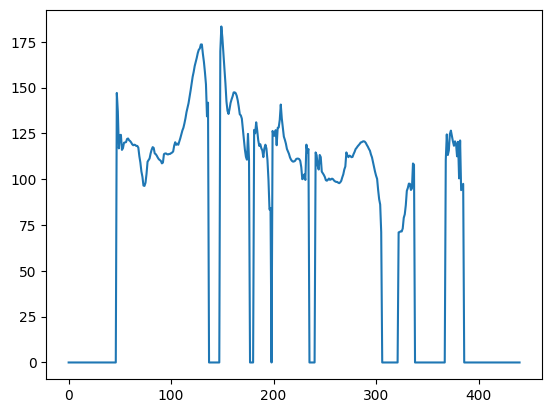

In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from WavenetDenoiser import SPWavenetDenoiser
from util import sample_from_CGM
import pyworld as pw
import soundfile as sf
import IPython
from preprocess import decode_harmonic, process_wav

x, fs = sf.read("G:/Projects/2022-2023/Butternut Box/Kieskeurig/Clip 5.wav")
f0, sp, ap = pw.wav2world(x, fs)

plt.plot(f0)
plt.show()

Testfile shape:  (1025, 60)
Coded ap shape: (1025, 4)
ap shape: (1025, 1025)
(1, 60)
[]


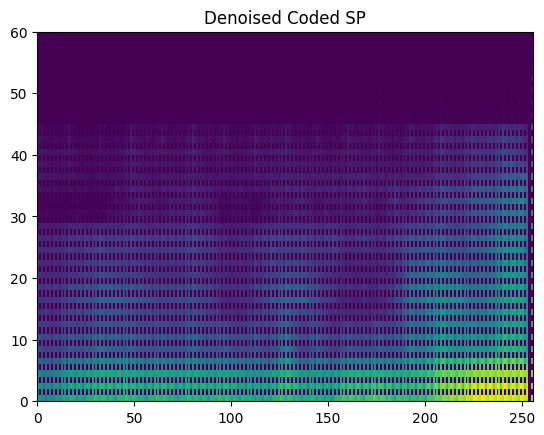

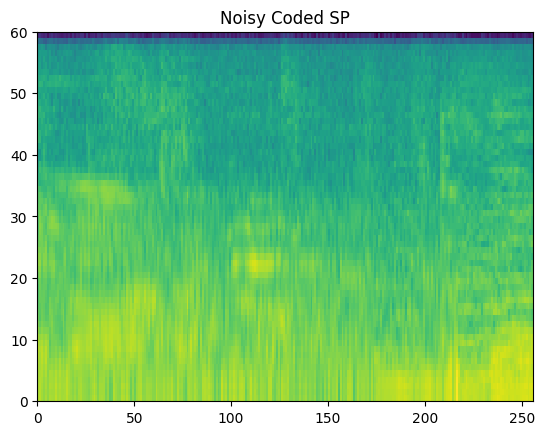

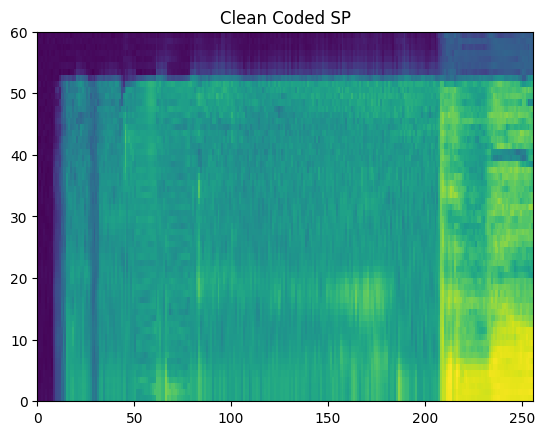

In [4]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from AutoEncoderDenoiser import SPDenoiser
from preprocess import code_harmonic

def normalize1(noisy_file):
    noisy_file = torch.from_numpy(noisy_file)

    sp_min = torch.min(noisy_file)

    sp_max = torch.max(noisy_file)

    clean_file = (noisy_file - sp_min) / (sp_max - sp_min) - 0.5


    return clean_file, sp_min, sp_max

testfile = np.load("G:/Projects/2022-2023/ConvDenoiser/dataset/output5/sp/common_voice_en_34919242.mp3_sp.npy").astype(np.float32)
realcleanfile = np.load("G:/Projects/2022-2023/ConvDenoiser/dataset/output5/csp/common_voice_en_34919242.mp3_sp.npy").astype(np.float32)
apc = np.load("G:/Projects/2022-2023/ConvDenoiser/dataset/output5/cap2/common_voice_en_34919242.mp3_ap.npy")
coded_apc = np.load("G:/Projects/2022-2023/ConvDenoiser/dataset/output5/cap/common_voice_en_34919242.mp3_ap.npy")
f0c = np.load("G:/Projects/2022-2023/ConvDenoiser/dataset/output5/f0c/common_voice_en_34919242.mp3_f0.npy")
spc = np.load("G:/Projects/2022-2023/ConvDenoiser/dataset/output5/csp2/common_voice_en_34919242.mp3_sp.npy")
print('Testfile shape: ', np.shape(testfile))
print('Coded ap shape:', np.shape(coded_apc))

print('ap shape:', np.shape(apc))

device='cuda'

# Model hyperparameters
filters = (512, 256, 128, 64, 32)
kernels = (3, 3, 3, 3, 3)
strides = (2, 2, 2, 2, 1)
output_pads = (1, 1, (0,1), 1, 0)
latent_space_dim = 128

# spdenoiser = SPDenoiser(60, 210, filters, kernels, strides, latent_space_dim, output_pads, device = 'cuda').to('cuda')
# spdenoiser.load_state_dict(torch.load("./exports/firstDae"))

# realcleanfile = torch.nn.functional.normalize(torch.from_numpy(realcleanfile))
# realcleanfile = realcleanfile.cpu().detach().numpy()
testsamples = []

testfile, minny, maxy = normalize1(testfile)
spdenoiser.eval()

cleansamples = []
i = 0
while i < len(testfile) - 256:
    testsamples.append(testfile[i:i+256])
    cleansamples.append(realcleanfile[i:i+256])
    i += 1

print(np.shape(cleansamples[0][-1:]))
cleanfile = np.zeros((0,60))
realclean = np.zeros((0,60))
print(cleanfile)
k = 0

sample = testsamples[1].transpose(0,1).unsqueeze(0).unsqueeze(0).to('cuda')
output = spdenoiser(sample.type(torch.FloatTensor).to('cuda'))

# for sample in testsamples:
#     sample = torch.from_numpy(sample).transpose(0,1).unsqueeze(0).unsqueeze(0).to('cuda')
#     output = spdenoiser(sample.type(torch.FloatTensor).to('cuda'))
#     # print(output.size())
#     output = output.squeeze(0).squeeze(0).transpose(0,1).cpu().detach().numpy()
#     realclean = np.concatenate((realclean, cleansamples[k][-1:]), axis=0)
#     # print('Output size: ', np.shape(output))
#     cleanfile = np.concatenate((cleanfile, output), axis=0)
#     # print('Cleanfile shape: ', np.shape(cleanfile))
#     k += 1
#     exit()


cleanfile, _, __ = normalize1(realcleanfile)
output = output.squeeze().squeeze()

plt.pcolormesh(output.detach().cpu().numpy())
plt.title("Denoised Coded SP")
plt.show()

plt.pcolormesh(np.ndarray.transpose(testsamples[1].detach().cpu().numpy(), (1,0)))
plt.title("Noisy Coded SP")
plt.show()


plt.pcolormesh(np.ndarray.transpose(cleansamples[1], (1,0)))
plt.title("Clean Coded SP")
plt.show()




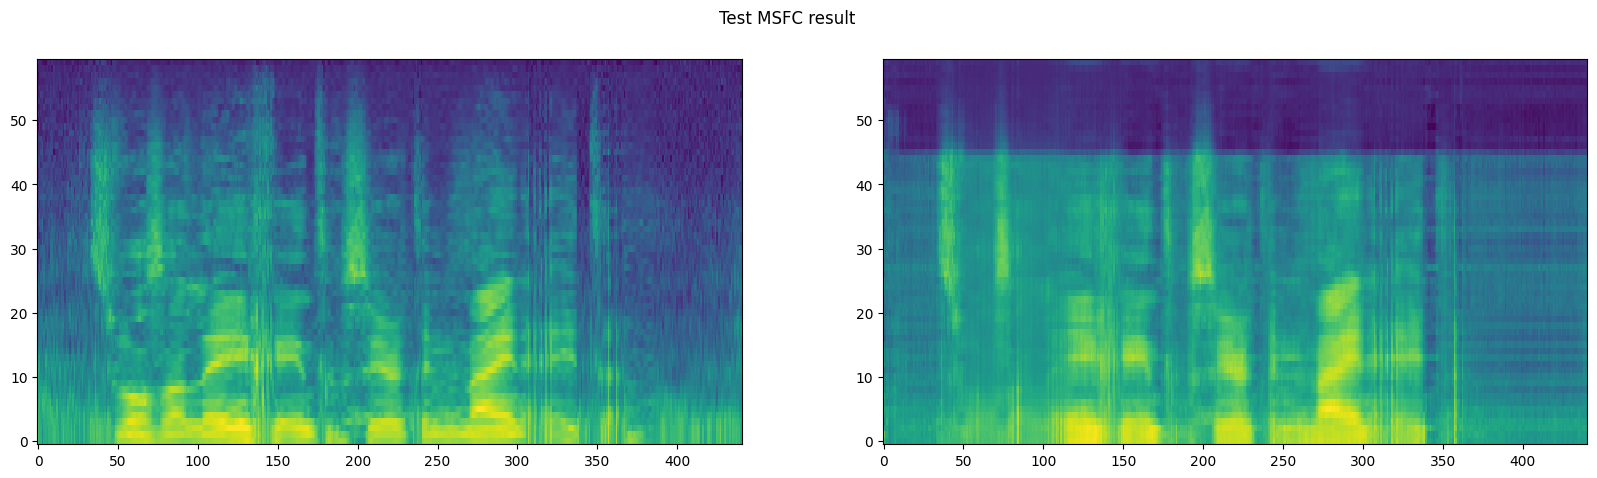

In [ ]:
sample = (generated.cpu().numpy().astype(np.double)+0.5) * (mx.detach().cpu().numpy() - mn.detach().cpu().numpy()) + mn.detach().cpu().numpy()
# og = (y.astype(np.double)+0.5) * (mx - mn) + mn
connie = (condition.cpu().numpy().astype(np.double)+0.5) * (mx.detach().cpu().numpy() - mn.detach().cpu().numpy()) + mn.detach().cpu().numpy()
# og = np.ndarray.transpose(og, (1,0))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle("Test MSFC result")
ax1.imshow(condition, aspect='auto', origin='lower', interpolation='none')
ax2.imshow(sample, aspect='auto', origin='lower', interpolation='none')
# ax3.imshow(og, aspect='auto', origin='lower', interpolation='none')
# ax4.imshow(sample - np.ndarray.transpose(conditionClean, (1,0)), aspect='auto', origin='lower', interpolation='none')
# ax5.imshow(connie - np.ndarray.transpose(conditionClean, (1,0)), aspect='auto', origin='lower', interpolation='none')

plt.show()

(441, 1025)


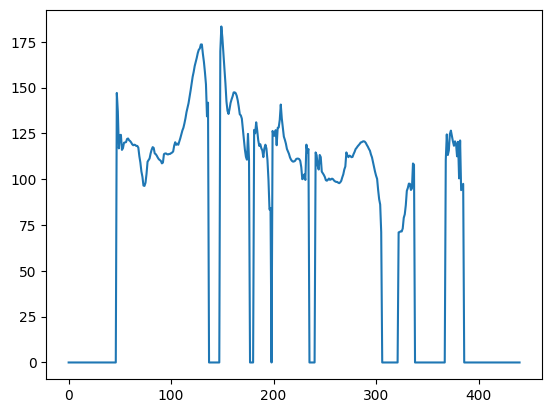

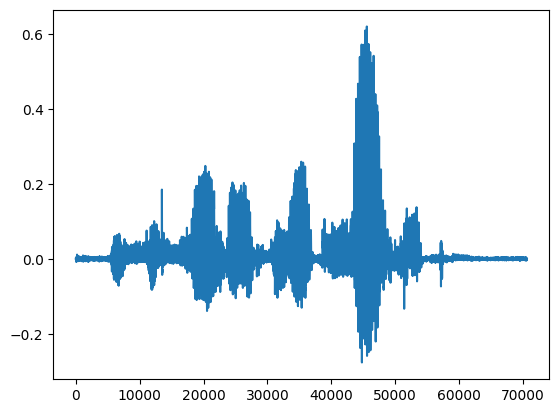

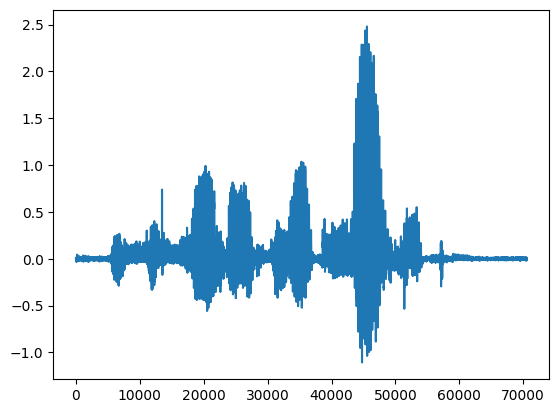

In [ ]:
# ap = np.ndarray.transpose(ap, (0,1))
print(np.shape(ap))
# vdata, vsamplerate = sf.read('H:/Downloads/DS_10283_1942/clean_trainset_wav/p227_249.wav')
# nf0, nsp, nap = pw.wav2world(vdata, vsamplerate)
# _f0, t = pw.dio(vdata, vsamplerate) 
audio = pw.synthesize(np.ascontiguousarray(f0), np.ascontiguousarray(decode_harmonic(np.ndarray.transpose(sample, (1,0)), 2048)), np.ascontiguousarray(ap), 32000)
# audio = pw.synthesize(np.ascontiguousarray(f0), np.ascontiguousarray(decode_harmonic(conditionClean, 2048)), np.ascontiguousarray(ap), 32000)

plt.plot(f0)
plt.show()

# plt.plot(_f0)
# plt.show()

plt.plot(audio)
plt.show()

audio  = audio * 4

plt.plot(audio)
plt.show()

IPython.display.display(IPython.display.Audio(audio, rate=32000))
sf.write("./npsstest.wav", audio, 32000)

In [ ]:
from diffwave.inference import predict as diffwave_predict
from preprocess import code_harmonic

model_dir = 'H:/Downloads/diffwave-ljspeech-22kHz-1000578 (2).pt'
spectrogram = decode_harmonic(np.ndarray.transpose(sample, (1,0)), 2048).astype(np.float32)
spectrogram = torch.from_numpy(np.ndarray.transpose(code_harmonic(spectrogram, 80), (1,0))).type(torch.FloatTensor)
print(spectrogram.size())
audio, sample_rate = diffwave_predict(spectrogram, model_dir)

torch.Size([80, 774])


torch.Size([1, 198144])


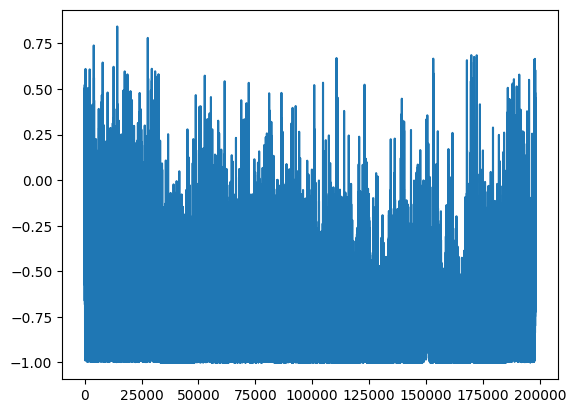

In [ ]:
print(audio.size())
plt.plot(np.squeeze(audio.detach().cpu().numpy()) )
plt.show()

IPython.display.display(IPython.display.Audio(audio.detach().cpu().numpy(), rate=sample_rate))
sf.write("./npsstest2.wav", np.squeeze(audio.detach().cpu().numpy()), sample_rate)